# Decision Trees
An introductory example of decision trees using data from this [interactive visualization](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/). This is an over-simplified example that doesn't use **normalization** as a pre-processing step, or **cross validation** as a mechanism for tuning the model.

## Set up

In [1]:
# Load packages
import pandas as pd
from sklearn import tree
from __future__ import division
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read data
df = pd.read_csv('./data/housing-data.csv')

## Data Exploration
Some basic exploratory analysis before creating a decision tree

In [3]:
# What is the shape of our data?
df.describe()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
count,492.000000,492.000000,492.000000,4.920000e+02,492.000000,492.000000,492.000000,492.000000
mean,0.544715,2.155488,1.905691,2.020696e+06,1959.103659,1522.989837,1195.632114,39.845528
std,0.498503,1.305133,1.068150,2.824055e+06,40.579602,1014.366252,733.765622,44.673248
min,0.000000,0.000000,1.000000,1.875180e+05,1880.000000,310.000000,270.000000,0.000000
25%,0.000000,1.000000,1.000000,7.490000e+05,1924.000000,832.750000,730.500000,10.000000
50%,1.000000,2.000000,2.000000,1.145000e+06,1960.000000,1312.000000,960.000000,18.500000
75%,1.000000,3.000000,2.000000,1.908750e+06,2001.000000,1809.000000,1419.000000,61.000000
max,1.000000,10.000000,10.000000,2.750000e+07,2016.000000,7800.000000,4601.000000,238.000000


In [144]:
# What variables are present in the dataset?


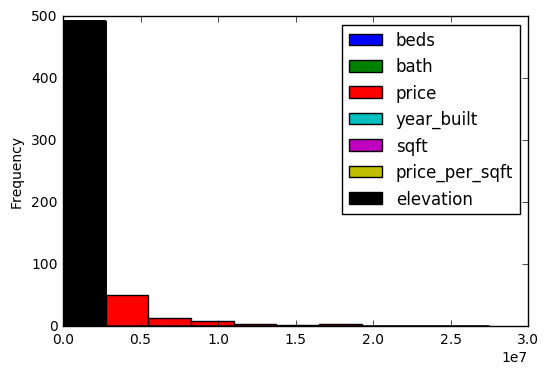

In [69]:
# What is the distribution of our outcome variable `in_sf`?
df.plot.hist(x='in_sf')

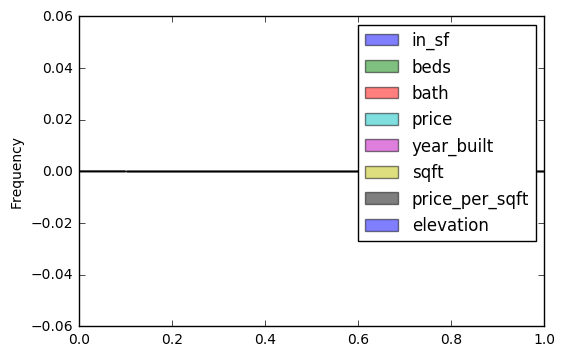

In [35]:
#df4 = pd.DataFrame({'a': df[df.in_sf == 1], 'b': df[df.in_sf == 0])

df4 = pd.DataFrame(df[df.in_sf == 1],df[df.in_sf == 1])
plt.figure();

df4.plot.hist(alpha=0.5)

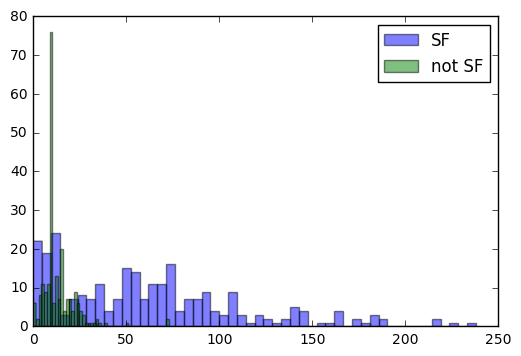

In [37]:
# # How does elevation vary for houses in/not-in sf (I suggest an overlapping histogram)
in_sf = df[df.in_sf == 1]
not_in_sf = df[df.in_sf == 0]

plt.hist(in_sf['elevation'], bins=50, alpha=0.5, label='SF')
plt.hist(not_in_sf['elevation'], bins=50, alpha=0.5, label='not SF')
plt.legend(loc='upper right')
plt.show()

## Build a decision tree using all variables

In [40]:
df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [72]:
# Create variables to hold features and outcomes separately
# features = df[['beds','bath','price','year_built','sqft','price_per_sqft','elevation']]
# outcomes = df['in_sf']
features = df.drop('in_sf',axis=1)
outcomes = df.in_sf

In [73]:
# Split data into testing and training sets
feat_train, feat_test, out_train, out_test = train_test_split(features, outcomes,train_size=0.6)

In [75]:
# Create a classifier and fit your features to your outcome
clf = tree.DecisionTreeClassifier()
clf = clf.fit(feat_train,out_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Assess Model Fit

In [83]:
# Generate a set of predictions for your test data
test_predict = clf.predict(feat_test)

#print test_predict
#len(test_predict)

[0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1
 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 0 0 0]


197

In [66]:
# Calculate accuracy for our test set (percentage of the time that prediction == truth)

264    1
17     0
188    0
236    1
417    1
Name: in_sf, dtype: int64

In [152]:
# By comparison, how well do we predict in our training data?


## Show the tree
A little bit of a pain, though there are some alternatives to the [documentation](http://scikit-learn.org/stable/modules/tree.html) presented [here](https://github.com/scikit-learn/scikit-learn/issues/6261). You may have to do the following:

```
# Install graphviz in your terminal
conda install graphviz
```

I then suggest the following solution:

```
tree.export_graphviz(clf, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
```


In [153]:
# Create tree diagram


## Comparion to KNN
Purely out of curiosity, how well does this model fit with KNN (for K=3)

In [85]:
# Create a knn classifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [86]:
# Fit our classifier to our training data
knn_fit = knn_clf.fit(feat_train, out_train)

In [154]:
# Predict on our test data and assess accuracy
